In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(42)
from sklearn.metrics import confusion_matrix
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
glaucoma_data=pd.read_csv('/content/gdrive/MyDrive/Drishti-GS1/Drishti-GS1_diagnosis.csv',header=0)
glaucoma_data.head(5)

,Drishti-GS File,Patient ID,Marking 1,Marking 2,Marking 3,Marking 4,Additional Expert,Total
0,drishtiGS_001,1077987,-1,-1,1,1,1,Glaucomatous
1,drishtiGS_002,1167573,1,1,1,1,1,Glaucomatous
2,drishtiGS_003,1393265,1,1,1,1,1,Glaucomatous
3,drishtiGS_004,1393265,1,1,-1,1,1,Glaucomatous
4,drishtiGS_005,1481925,1,1,1,1,1,Glaucomatous


In [ ]:
glaucoma_data.shape

(101, 8)

In [ ]:
le = LabelEncoder()
le.fit(glaucoma_data['Total'])
LabelEncoder()
print(list(le.classes_))

['Glaucomatous', 'Normal']


In [ ]:
glaucoma_data['label']=le.transform(glaucoma_data['Total'])
print(glaucoma_data.sample(10))

   Drishti-GS File  Patient ID  Marking 1  Marking 2  Marking 3  Marking 4  \
84   drishtiGS_085     2829822         -1         -1          1          1   
55   drishtiGS_056     2617454          1          1          1          1   
66   drishtiGS_067     2737392          1         -1          1          1   
67   drishtiGS_068     2745345          1          1          1          1   
45   drishtiGS_046     2508068         -1         -1         -1          1   
39   drishtiGS_040     2396691          1          1          1          1   
22   drishtiGS_023     2070741          1         -1          1          1   
44   drishtiGS_045     2489693          1          1          1          1   
10   drishtiGS_011     1731185          1          1          1          1   
0    drishtiGS_001     1077987         -1         -1          1          1   

    Additional Expert         Total  label  
84                 -1        Normal      1  
55                 -1  Glaucomatous      0  
66    

In [ ]:
glaucoma_data.head()

,Drishti-GS File,Patient ID,Marking 1,Marking 2,Marking 3,Marking 4,Additional Expert,Total,label
0,drishtiGS_001,1077987,-1,-1,1,1,1,Glaucomatous,0
1,drishtiGS_002,1167573,1,1,1,1,1,Glaucomatous,0
2,drishtiGS_003,1393265,1,1,1,1,1,Glaucomatous,0
3,drishtiGS_004,1393265,1,1,-1,1,1,Glaucomatous,0
4,drishtiGS_005,1481925,1,1,1,1,1,Glaucomatous,0


In [ ]:
glaucoma_data.shape

(101, 9)

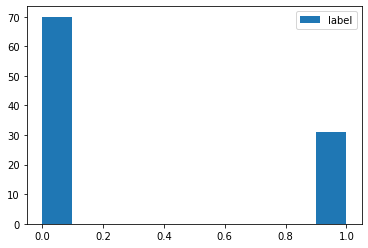

In [ ]:
plt.hist(glaucoma_data['label'],label='label')
plt.legend()

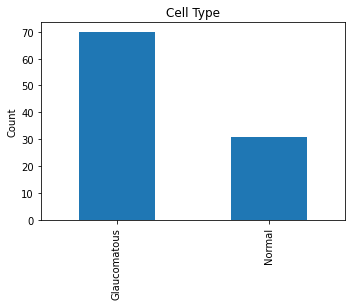

In [ ]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221)
glaucoma_data['Total'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

In [ ]:
from sklearn.utils import resample

In [ ]:
print(glaucoma_data['label'].value_counts())

0    70
1    31
Name: label, dtype: int64


In [ ]:
df_0 = glaucoma_data[glaucoma_data['label']==0]
df_1 = glaucoma_data[glaucoma_data['label']==1]

In [ ]:
df_0.shape

(70, 9)

In [ ]:
n_samples=400

In [ ]:
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)

In [ ]:
df_0_balanced.shape

(400, 9)

In [ ]:
data_glaucoma_balanced = pd.concat([df_0_balanced,df_1_balanced,])

In [ ]:
data_glaucoma_balanced.shape

(800, 9)

In [ ]:
print(data_glaucoma_balanced['label'].value_counts())

0    400
1    400
Name: label, dtype: int64


In [ ]:
images_path = {os.path.splitext(os.path.basename(x))[0]: x
               for x in glob(os.path.join('/content/gdrive/MyDrive/Drishti-GS1/','*','*.png'))}

In [ ]:
print(images_path)

{'drishtiGS_002': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_002.png', 'drishtiGS_004': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_004.png', 'drishtiGS_008': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_008.png', 'drishtiGS_010': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_010.png', 'drishtiGS_012': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_012.png', 'drishtiGS_015': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_015.png', 'drishtiGS_016': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_016.png', 'drishtiGS_017': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_017.png', 'drishtiGS_018': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_018.png', 'drishtiGS_022': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_022.png', 'drishtiGS_024': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_024.png', 'drishtiGS_026': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_026.png', 'drishtiGS_031': '/content/

In [ ]:
data_glaucoma_balanced['path'] = glaucoma_data['Drishti-GS File'].map(images_path.get)

In [ ]:
data_glaucoma_balanced.head()

,Drishti-GS File,Patient ID,Marking 1,Marking 2,Marking 3,Marking 4,Additional Expert,Total,label,path
66,drishtiGS_067,2737392,1,-1,1,1,-1,Glaucomatous,0,/content/gdrive/MyDrive/Drishti-GS1/images/dri...
20,drishtiGS_021,2040729,1,1,1,1,1,Glaucomatous,0,/content/gdrive/MyDrive/Drishti-GS1/images/dri...
76,drishtiGS_077,2804213,1,-1,1,1,-1,Glaucomatous,0,/content/gdrive/MyDrive/Drishti-GS1/images/dri...
26,drishtiGS_027,2248277,1,1,1,1,-1,Glaucomatous,0,/content/gdrive/MyDrive/Drishti-GS1/images/dri...
29,drishtiGS_030,2292498,-1,1,1,1,1,Glaucomatous,0,/content/gdrive/MyDrive/Drishti-GS1/images/dri...


In [ ]:
size=128

In [ ]:
data_glaucoma_balanced['image'] = data_glaucoma_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((size,size))))

In [ ]:
data_glaucoma_balanced.head()

,Drishti-GS File,Patient ID,Marking 1,Marking 2,Marking 3,Marking 4,Additional Expert,Total,label,path,image
66,drishtiGS_067,2737392,1,-1,1,1,-1,Glaucomatous,0,/content/gdrive/MyDrive/Drishti-GS1/images/dri...,"[[[3, 1, 3], [3, 1, 3], [3, 1, 3], [3, 1, 3], ..."
20,drishtiGS_021,2040729,1,1,1,1,1,Glaucomatous,0,/content/gdrive/MyDrive/Drishti-GS1/images/dri...,"[[[3, 1, 3], [3, 1, 3], [3, 1, 3], [3, 1, 3], ..."
76,drishtiGS_077,2804213,1,-1,1,1,-1,Glaucomatous,0,/content/gdrive/MyDrive/Drishti-GS1/images/dri...,"[[[3, 1, 3], [3, 1, 3], [3, 1, 3], [3, 1, 3], ..."
26,drishtiGS_027,2248277,1,1,1,1,-1,Glaucomatous,0,/content/gdrive/MyDrive/Drishti-GS1/images/dri...,"[[[3, 1, 3], [3, 1, 3], [3, 1, 3], [3, 1, 3], ..."
29,drishtiGS_030,2292498,-1,1,1,1,1,Glaucomatous,0,/content/gdrive/MyDrive/Drishti-GS1/images/dri...,"[[[3, 1, 3], [3, 1, 3], [3, 1, 3], [3, 1, 3], ..."


In [ ]:
n_images = 4

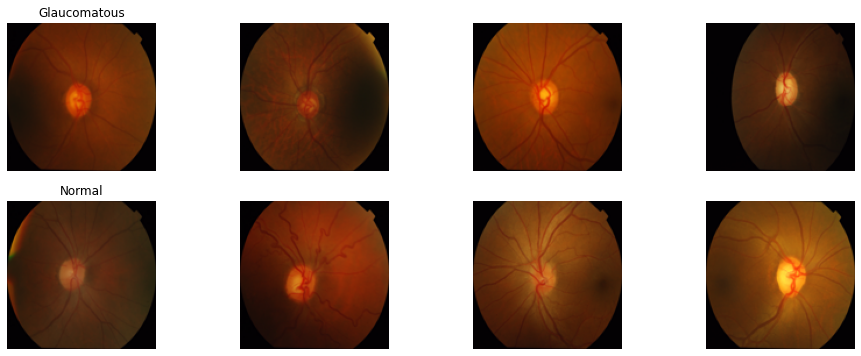

In [ ]:
fig, m_axs = plt.subplots(2, n_images, figsize = (4*n_images, 3*2))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         data_glaucoma_balanced.sort_values(['Total']).groupby('Total')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_images, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [ ]:
X = np.asarray(data_glaucoma_balanced['image'].tolist())

In [ ]:
X= np.array(X).reshape(800,-1)

In [ ]:
X = X/255.

In [ ]:
X.shape

(800, 49152)

In [ ]:
X = X.reshape(-1, X.shape[3])

In [ ]:
X.shape

(800, 49152)

In [ ]:
Y = data_glaucoma_balanced['label']

In [ ]:
Y.shape

(800,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
param={'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
      'C':np.arange(1,2,4),
      'degree':np.arange(3,6),
      'coef0':np.arange(0.001,3,0.5),
      'gamma': ('auto', 'scale',1,2)}

In [ ]:
SVModel= SVC()
grids=GridSearchCV(SVModel,param,cv=5)
grids.fit(x_train,y_train)

In [ ]:
grids.best_params_

In [ ]:
SVModel=SVC(kernel='rbf',C=1,gamma=0.1)
SVModel.fit(x_train,y_train)

SVC(C=1, gamma=0.1)

In [ ]:
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_test,SVModel.predict(x_test))

In [ ]:
acc_score

1.0

In [ ]:
acc_score=accuracy_score(y_test,SVModel.predict(x_test))

In [ ]:
print("accuracy=",acc_score)

accuracy= 1.0


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cm = confusion_matrix(y_test,SVModel.predict(x_test))

In [ ]:
print(cm)

[[41  0]
 [ 0 39]]


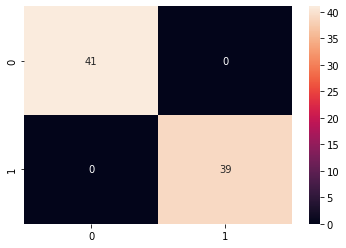

In [ ]:
sns.heatmap(cm,annot=True,fmt='g')

Text(0, 0.5, 'Fraction of incorrect predictions')

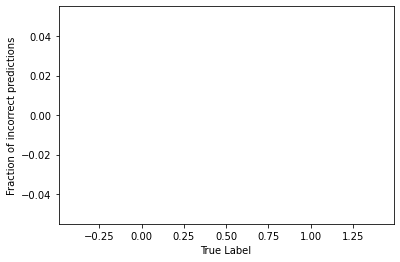

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
y_pred = SVModel.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = -1)

In [ ]:
cp = classification_report(y_test,y_pred)
print(cp)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        39

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

